# Importing Libraries & csv files

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


# Reading the file
df = pd.read_csv('feature_usage_dataset.csv')

# Data Cleaning

In [40]:
df.head(1)

,user_id,session_id,timestamp,feature_name,action,device,user_type,region
0,U1327,S1456,2025-05-02 04:11:12,dashboard,complete,desktop,free,US


In [41]:
df.isnull().sum()

# No null values are present in our dataset

user_id         0
session_id      0
timestamp       0
feature_name    0
action          0
device          0
user_type       0
region          0
dtype: int64

In [42]:
# Grouping the feature and date according to the user count (one particular use has used that feature at that particular time)
# Ensure 'timestamp' is a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract desired time granularity (e.g., daily)
df['date'] = df['timestamp'].dt.date

# Group by feature and date, then count unique users
unique_users_per_feature_date = (
    df.groupby(['feature_name', 'date'])['user_id']
    .nunique()
    .reset_index(name='unique_user_count')
)

print(unique_users_per_feature_date)


    feature_name        date  unique_user_count
0      dashboard  2025-03-13                 14
1      dashboard  2025-03-14                 27
2      dashboard  2025-03-15                 21
3      dashboard  2025-03-16                 26
4      dashboard  2025-03-17                 26
..           ...         ...                ...
361     settings  2025-05-08                 31
362     settings  2025-05-09                 31
363     settings  2025-05-10                 19
364     settings  2025-05-11                 29
365     settings  2025-05-12                 14

[366 rows x 3 columns]


hour       0   1   2   3   4   5   6   7   8   9   ...  14  15  16  17  18  \
weekday                                            ...                       
Monday     83  50  57  57  59  67  57  62  59  58  ...  50  49  60  53  66   
Tuesday    58  45  53  63  51  53  63  54  52  55  ...  45  54  57  40  67   
Wednesday  66  59  58  48  52  51  63  57  67  48  ...  57  58  55  55  57   
Thursday   52  53  41  50  52  48  43  74  72  59  ...  62  53  60  63  69   
Friday     59  75  64  68  65  66  73  63  66  68  ...  71  58  65  50  62   
Saturday   63  59  57  65  69  54  68  60  52  69  ...  70  71  50  73  45   
Sunday     75  62  71  54  68  60  55  57  70  70  ...  64  78  56  65  57   

hour       19  20  21  22  23  
weekday                        
Monday     61  59  48  60  47  
Tuesday    58  46  66  53  47  
Wednesday  64  35  56  47  46  
Thursday   68  58  58  66  66  
Friday     68  52  52  74  67  
Saturday   64  68  59  60  52  
Sunday     73  69  55  58  65  

[7 rows 

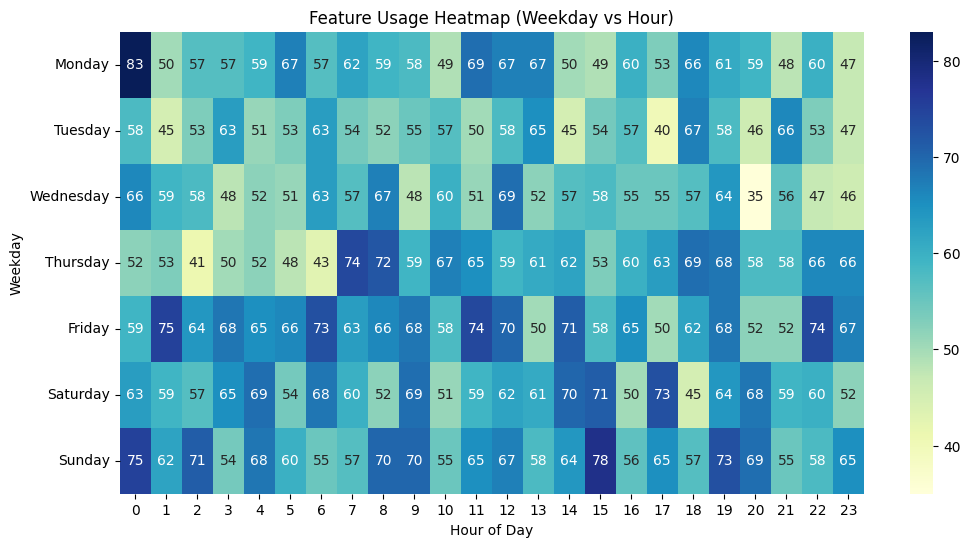

In [43]:
# heatmap for feature usage by hour/weekday


# Extract weekday (0=Monday) and hour
df['weekday'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour

# Group by weekday and hour, count feature usage
usage_heatmap = (
    df.groupby(['weekday', 'hour'])['feature_name']
    .count()
    .reset_index(name='usage_count')
)

# Pivot for heatmap
pivot_table = usage_heatmap.pivot(index='weekday', columns='hour', values='usage_count')

# Reorder weekdays
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(ordered_days)
print(pivot_table)
# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Feature Usage Heatmap (Weekday vs Hour)')
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.show()

# Conclusions
# 1) Peaks hours are identified on Saturdays between 15:00 and 17:00 and on Mondys moidnight, indicating strong engagement during late-night and weekend hours.
# I1)  This can imoky that schedule maintenance & deployments should be placed outside these windows & target new features or notifications during these periods could lead to more visibility.
# 2) Weekend usage is more evenly distributed across the day, while weekday usage is concentrated in the morning (8-10 AM) & evening (5-7PM)

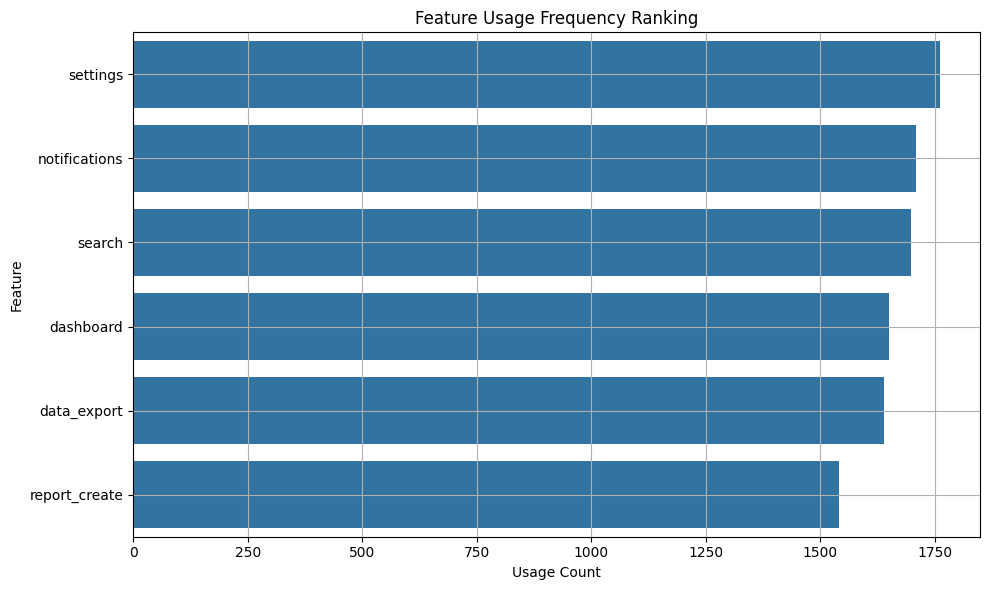

Feature with the largest usage count:
  feature_name  usage_count
0     settings         1761

Feature with the lowest usage count:
    feature_name  usage_count
5  report_create         1542


In [44]:
# Ranking Features by usage frequency

# Step 1: Count frequency
feature_ranking = df['feature_name'].value_counts().reset_index().sort_index()
feature_ranking.columns = ['feature_name', 'usage_count']  # explicitly rename

# Step 2: Plot

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_ranking, x='usage_count', y='feature_name')
plt.title('Feature Usage Frequency Ranking')
plt.xlabel('Usage Count')
plt.ylabel('Feature')
plt.tight_layout()
plt.grid()
plt.show()

# Step 3: Conclusions
# Get the top 1 feature with the largest usage count
max_usage = feature_ranking.nlargest(1, 'usage_count')

# Get the top 1 feature with the lowest usage count
min_usage = feature_ranking.nsmallest(1, 'usage_count')

# Display the results
print("Feature with the largest usage count:")
print(max_usage)

print("\nFeature with the lowest usage count:")
print(min_usage)

# setting feature ha the maximum frequency of usage with 1761 usage count.
# report creation feature has the least frequency with 1542 number of usages.